# Pandas

Pandas is a data analysis and manipulation tool built on top of NumPy. The `pandas` library will be introduced and used here.

In [23]:
# Import all libraries needed for the tutorial
import matplotlib.pyplot as plt
import pandas as pd
import random

# This is only required to enable inline plotting in Jupyter notebooks
%matplotlib inline

We'll be using Pandas primarily to load and manipulate data in Excel sheets. First, however, we'll need to go through some basics. We'll do so by going through an example where we create, manipulate and analyse a data set.

### Create Data

The data set will consist of 1,000 baby names and the number of births recorded for the year 1880. We will also add plenty of duplicates so you will see the same baby name more than once. You can think of the multiple entries per name simply being different hospitals around the country reporting the number of births per baby name. So if two hospitals reported the baby name "Bob", the data will have two values for the name Bob. We will start by creating a set of baby names.

In [2]:
# The inital set of baby names
names = ['Bob','Jessica','Mary','John','Mel']

To make a random list of 1000 baby names using the set above we will generate a random number between 0 and 4. To do this we will be using the functions `seed`, `randint`, `len`, `range`, and `zip`. Remember that `seed` instantiates the random number generation algorithm used by `randint` such that the sequence. The sequence of random numbers will always be the same if the same seed is applied. The `zip` function combines two or more lists to create a list of tuples.

In [24]:
random.seed(500)
random_names = []

for i in range(1000):
    random_number = random.randint(0, len(names) - 1)
    random_names.append(names[random_number])

# The number of births per name for the year 1880
births = [random.randint(0, 1000) for i in range(1000)]

# Merge the names and the births data set using the zip function
BabyDataSet = list(zip(random_names,births))

print(BabyDataSet[:10])

[('John', 665), ('Mel', 799), ('Mel', 763), ('John', 580), ('Mary', 330), ('John', 402), ('Jessica', 499), ('Bob', 118), ('Mary', 7), ('Mel', 20)]



* `seed(500)` - Create seed
* `randint(0, len(names))` - Generate a random integer between zero and the length of the list `names`. We need to subtract this by one since `randint` will also include the maximum value (is inclusive of the maximum)
* `names[n]` - Select the name where its index is equal to n.
* `for i in range(n)` - Loop until i is equal to n, i.e. 1,2,3,....n.

We are basically done creating the data set. We will now use the pandas library to export this data set into a CSV file.

In [25]:
df = pd.DataFrame(data=BabyDataSet, columns=['Names', 'Births'])

df[:10]

,Names,Births
0,John,665
1,Mel,799
2,Mel,763
3,John,580
4,Mary,330
5,John,402
6,Jessica,499
7,Bob,118
8,Mary,7
9,Mel,20


`df` is a `DataFrame` object. You can think of this object holding the contents of the BabyDataSet in a format similar to an excel spreadsheet. When printing dataframes they are automatically tabulated for easier reading.

We will now export dataframes to a CSV file, which we will name `births1880.csv`. The function `to_csv` will be used to export the file. The only parameters we will use is `index` and `header`. Setting these parameters to `False` will prevent the index and header names from being exported. Change the value of these parameters to get a better undertanding of their use. 

In [5]:
df.to_csv('births1880.csv', index=False, header=False)

### Grab Data

To read back the CSV file we will use the function `read_csv`. We will simply pass it the filename of the text file we want to read.

In [6]:
df = pd.read_csv('births1880.csv')

df[:10]

,John,665
0,Mel,799
1,Mel,763
2,John,580
3,Mary,330
4,John,402
5,Jessica,499
6,Bob,118
7,Mary,7
8,Mel,20
9,Bob,833


Note that the `read_csv` function treated the first record in the CSV file as the header names. This is obviously not correct since the text file did not provide us with header names. To correct this we will pass the `header` parameter to the `read_csv` function and set it to None

In [7]:
df = pd.read_csv('births1880.csv', header=None)

df[:10]

,0,1
0,John,665
1,Mel,799
2,Mel,763
3,John,580
4,Mary,330
5,John,402
6,Jessica,499
7,Bob,118
8,Mary,7
9,Mel,20


If we wanted to give the columns specific names, we would have to pass another parameter called `names`. We can also omit the header parameter in this case

In [8]:
df = pd.read_csv('births1880.csv', names=['Names', 'Births'])

df[:10]

,Names,Births
0,John,665
1,Mel,799
2,Mel,763
3,John,580
4,Mary,330
5,John,402
6,Jessica,499
7,Bob,118
8,Mary,7
9,Mel,20


You can think of the numbers [0, 1, 2, ...] as the row numbers in an Excel file. In pandas these are part of the *index* of the dataframe. `[Names, Births]` can be thought of as column headers similar to the ones found in an Excel spreadsheet.

We can also print out some information about the read in dataframe

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Names   1000 non-null   object
 1   Births  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


This tells us that:
* There are 1000 records in the data set
* There is a column named `Names` with 1000 values
* There is a column named `Births` with 1000 values
* Out of the two columns, one is numeric and the other is non numeric

We can use the `head()` function which will return the first five record. You can also pass in a number `n` to return the top `n` records of the dataframe. On the other hand, `tail()` returns the last five records.

In [10]:
df.head()

,Names,Births
0,John,665
1,Mel,799
2,Mel,763
3,John,580
4,Mary,330


In [11]:
df.tail()

,Names,Births
995,Jessica,440
996,Mary,579
997,Jessica,522
998,John,233
999,Mel,961


In [12]:
# Delete the csv file now, we are done using it
import os
os.remove('births1880.csv')

### Prepare Data

The data we have consists of baby names and the number of births in the year 1880. We already know that we have 1,000 records and none of the records are missing. We can verify the `Names` collumn still only has five unique names. We can use the `unique` property of the dataframe to find all the unique records of the `Names` column

In [13]:
# Method 1:
df['Names'].unique()

array(['John', 'Mel', 'Mary', 'Jessica', 'Bob'], dtype=object)

In [14]:
# Method 2:
df['Names'].describe()

count     1000
unique       5
top       Mary
freq       220
Name: Names, dtype: object

Since we have multiple values per baby name, we need to aggregate this data so we only have a baby name appear once. This means the 1000 rows will need to become 5. We can accomplish this by using the `groupby` function.

In [26]:
# Create a groupby object
name = df.groupby('Names')

# Apply the sum function to the grouby object
df = name.sum()

# Show result
df

,Births
Names,
Bob,94505
Jessica,98358
John,106004
Mary,101369
Mel,109685


### Analyze Data

To find the most popular name or the baby name with the highest birth rate we can do one of the following:
* Sort the dataframe and select the top row
* Use the `max()` attribute to find the maximum value

In [27]:
# Method 1:
sorted_list = df.sort_values(['Births'], ascending=False)
sorted_list.head(1)

,Births
Names,
Mel,109685


In [28]:
# Method 2
df['Births'].max()

109685

### Present Data

Here we can plot the Births column and label the graph to show the highest point on the graph. We will use the `plot.bar` function to generate a bar plot of the data contained in a data frame, as well as present a table containing the births per name sorted in ascending order using the `sort_values` function

,Births
Names,
Mel,109685
John,106004
Mary,101369
Jessica,98358
Bob,94505


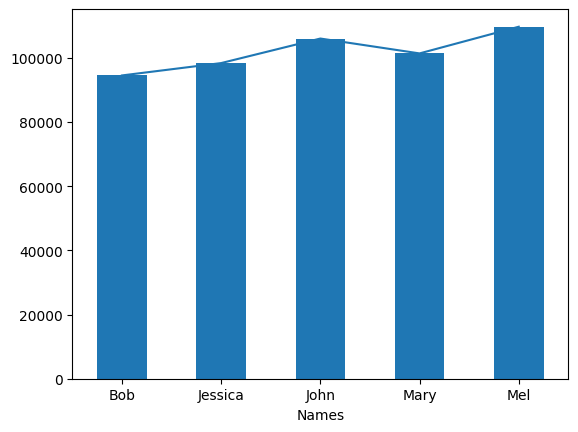

In [18]:
df['Births'].plot.bar()
df['Births'].plot.line()

df.sort_values(by='Births', ascending=False)

You can find a list of tutorial on Pandas [here](http://pandas.pydata.org/pandas-docs/version/0.15/tutorials.html)

## Useful Pandas features

### Export data to Excel

Note that for Pandas to be able to write and read Excel files you need to:
* Have Microsoft Excel installed
* Install the openpyxl Python package (if you are using Anaconda these should be installed automatically)

To install the above packages on Repl you need to:
* Open the Repl you want to export to or read from Excel in
* Go to the `Shell` tab on the right hand side
* Type the following command: `pip install openpyxl` and press Enter

In [29]:
# Create DataFrame
d = [1, 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9]
df = pd.DataFrame(d, columns = ['Number'])

df

,Number
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9


In [32]:
# Export to Excel
df.to_excel('pandas.xlsx', sheet_name='my_sheet', index=False)

Here we first create a pandas dataframe which consists of a single columns containing numbers. Then we use the `to_excel` function to create an Excel file containing a single worksheet called `my_sheet`. This sheet then contains the data, excluding the index (otherwise two columns would be created, one for the index and one for the numbers).

### Import from Excel

In [33]:
# Read back the excel file generated in the previous example
df = pd.read_excel('pandas.xlsx', 0)
df.head()

,Number
0,1
1,2
2,3
3,4
4,5


The above reads back the Excel file generated in the previous example. The second argument is the sheet name or ID, which in this case is 0, meaning that we're reading the first sheet in the file. 